In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from math import sqrt, floor

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
dataset = pd.read_csv("./data/dataset.csv")
X = dataset
y = dataset["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [4]:
X_train.shape

(1168, 81)

In [5]:
pd.set_option("display.max_columns", X_train.shape[0])

In [6]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
618,619,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,452.0,Ex,TA,PConc,Ex,TA,Av,GLQ,48,Unf,0,1774,1822,GasA,Ex,Y,SBrkr,1828,0,0,1828,0,0,2,0,3,1,Gd,9,Typ,1,Gd,Attchd,2007.0,Unf,3,774,TA,TA,Y,0,108,0,0,260,0,NaN,NaN,NaN,0,7,2007,New,Partial,314813
870,871,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,Gd,N,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1962.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,109500
92,93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1921,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,BrkTil,Gd,TA,No,ALQ,713,Unf,0,163,876,GasA,Ex,Y,SBrkr,964,0,0,964,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1921.0,Unf,2,432,TA,TA,Y,0,0,44,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500
817,818,20,RL,NaN,13265,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,CemntBd,CmentBd,BrkFace,148.0,Gd,TA,PConc,Gd,TA,No,GLQ,1218,Unf,0,350,1568,GasA,Ex,Y,SBrkr,1689,0,0,1689,1,0,2,0,3,1,Gd,7,Typ,2,Gd,Attchd,2002.0,RFn,3,857,TA,TA,Y,150,59,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,271000
302,303,20,RL,118.0,13704,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,150.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1541,1541,GasA,Ex,Y,SBrkr,1541,0,0,1541,0,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,3,843,TA,TA,Y,468,81,0,0,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal,205000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,RL,82.0,9430,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,673.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,1163,Unf,0,89,1252,GasA,Ex,Y,SBrkr,1268,1097,0,2365,1,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,1999.0,RFn,3,856,TA,TA,Y,0,128,0,0,180,0,NaN,NaN,NaN,0,7,2009,WD,Normal,337000
835,836,20,RL,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,4,7,1950,1995,Gable,CompShg,VinylSd,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,No,BLQ,442,Unf,0,625,1067,GasA,TA,Y,SBrkr,1067,0,0,1067,0,0,2,0,2,1,Gd,4,Min2,0,NaN,Attchd,1996.0,Unf,2,436,TA,TA,Y,290,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,128000
1216,1217,90,RM,68.0,8930,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1.5Fin,6,5,1978,1978,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1318,584,0,1902,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1978.0,Unf,2,539,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,112000
559,560,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,18.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0,Unf,0,1374,1

In [7]:
X_train.drop(["Id"], axis="columns", inplace=True)

# Handling Missing Values

In [8]:
describe_missing = lambda df: df.isna().sum().to_frame("NaN Count").transpose().append(df.isna().mean().rename("NaN Ratio"))
describe_missing(X_train)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
NaN Count,0.0,0.0,212.000000,0.0,0.0,1097.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,6.000000,0.0,0.0,0.0,28.000000,28.000000,28.000000,28.000000,0.0,29.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,551.000000,58.000000,58.000000,58.000000,0.0,0.0,58.000000,58.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1164.000000,954.000000,1119.000000,0.0,0.0,0.0,0.0,0.0,0.0
NaN Ratio,0.0,0.0,0.181507,0.0,0.0,0.939212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005137,0.005137,0.0,0.0,0.0,0.023973,0.023973,0.023973,0.023973,0.0,0.024829,0.0,0.0,0.0,0.0,0.0,0.0,0.000856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.471747,0.049658,0.049658,0.049658,0.0,0.0,0.049658,0.049658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996575,0.816781,0.958048,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_train.isna().sum().sum()

5541

## Removing Missing Values

Keep columns that have at least 30% of their values as non-`nan`. i.e, remove columns that have at least 70% of their valeus as `nan`

In [10]:
sparse_cols_series = X_train.isna().mean() >= .7
sparse_cols = sparse_cols_series[sparse_cols_series].index.tolist()
X_train.dropna(axis="columns", thresh=.3*X_train.shape[0], inplace=True)

Remove the rows which make some columns have missing values ratio between (0, .1]

In [11]:
rows_to_stay = X_train[X_train.columns[X_train.isna().mean().between(0, .1, inclusive="right")]].notna().all(axis="columns")
X_train = X_train[rows_to_stay]
y_train = y_train[rows_to_stay]

In [12]:
describe_missing(X_train)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
NaN Count,0.0,0.0,201.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,478.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NaN Ratio,0.0,0.0,0.186284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_train.shape

(1079, 76)

## Imputing Missing Values

In [14]:
X_train["LotFrontage"].to_frame().transpose()

,618,870,92,817,302,1454,40,959,75,1389,1254,689,648,247,1308,1164,708,186,914,8,390,1333,1441,619,771,465,1248,1288,1120,1031,703,641,1331,540,1161,863,1101,506,546,1051,997,1357,867,1116,425,905,481,483,1382,1128,672,1269,1385,494,569,501,1313,773,1264,759,799,251,249,583,1245,1390,1375,1292,1018,1213,1430,810,477,874,505,1418,634,752,1405,194,240,1276,729,1397,1255,49,998,411,1246,776,581,693,77,1381,44,1195,980,993,300,1401,1058,276,467,489,269,408,1448,875,1374,283,839,399,883,406,512,338,363,692,1334,983,320,427,195,1231,900,70,1125,794,10,1026,686,1247,271,445,654,1280,898,64,682,1384,1100,416,1034,853,472,328,608,452,1227,530,1399,922,912,418,906,751,828,1296,901,716,1069,1226,500,471,1447,487,1336,1177,131,15,1086,911,435,1369,476,1150,466,1127,1424,587,1157,938,1224,721,402,1457,187,191,103,789,60,1064,536,1110,887,1268,1378,934,758,473,82,1148,657,349,1291,1270,117,831,252,1426,311,1133,395,358,263,359,985,1140,726,1393,16,995,1139,761,351,539,1330,969,996,97,1072,1271,196,183,1281,1417,1196,1406,674,81,1220,397,267,1266,132,265,943,1203,565,1130,294,261,1263,629,1431,1414,405,356,239,884,1428,895,988,1442,1001,453,110,1189,1240,1169,1146,503,1063,711,801,864,367,1444,384,200,65,957,783,272,1267,757,1087,744,541,478,808,1126,1310,1180,188,1259,981,904,316,214,878,1398,1400,531,255,30,1115,230,844,893,913,793,1377,264,101,13,1135,790,944,841,566,935,1372,523,1352,1158,670,933,1202,1093,366,1041,228,417,206,79,190,492,725,145,1015,318,820,1186,457,144,1210,992,824,760,1459,592,1154,918,83,154,999,1395,748,1309,880,403,150,1061,413,955,1324,987,717,840,805,847,352,95,625,571,37,485,143,762,158,552,818,792,982,1046,746,236,920,222,1279,1170,940,661,588,881,1258,62,1277,193,235,181,1174,892,923,521,669,829,924,1027,733,382,1354,331,798,262,6,266,38,1416,545,118,652,785,1023,105,1091,484,1408,842,683,20,242,50,162,731,764,877,1178,301,1052,172,707,658,1095,284,1036,1262,1445,1456,1191,1197,668,1346,344,306,217,1432,289,378,167,421,225,616,12,522,1092,68,1188,380,950,372,258,1236,1239,304,1305,410,1411,42,208,974,490,596,74,515,285,1187,71,561,179,915,1368,493,116,293,76,861,775,772,1205,1005,576,622,564,1012,1423,409,1451,1437,1229,288,994,630,524,157,337,1380,496,46,747,135,753,462,953,862,439,177,570,424,325,643,664,350,447,916,1332,1099,1433,1032,946,1360,345,475,313,754,451,170,699,1458,133,813,1165,830,1287,346,396,1193,389,385,1347,119,1103,1113,229,1235,21,766,243,1079,35,593,671,507,1440,1089,961,1181,109,937,379,869,604,1311,627,796,902,660,723,171,677,238,700,1062,1222,856,709,1434,321,120,1295,1238,624,138,456,66,848,745,1056,780,1286,626,605,1443,1209,178,1376,415,100,1230,219,741,334,1190,114,834,681,833,220,391,1344,939,309,1306,1366,527,1010,245,685,518,1050,1044,1370,971,394,640,104,815,1059,1149,720,814,51,602,354,1371,460,22,374,538,1160,218,585,1024,1365,1054,414,205,1183,497,516,702,676,975,185,1132,404,706,419,1185,173,690,827,428,1076,1256,718,282,1088,499,691,0,926,1147,1151,327,213,852,246,1439,1175,1315,1098,1364,365,248,26,836,1319,680,1121,3,134,837,355,292,698,1242,369,1199,226,339,1302,603,454,63,990,237,112,1436,1212,577,126,1008,1156,851,694,137,7,502,854,947,631,929,407,1422,357,153,343,305,1303,612,1145,280,1249,1413,1080,400,468,504,534,1016,903,1253,550,1297,1184,945,336,59,1118,1361,449,855,1142,1136,1299,437,786,873,1343,819,1006,586,941,348,1194,1028,463,1363,653,573,647,595,890,470,800,281,932,732,715,832,951,1144,1037,1168,455,584,147,160,1111,1117,859,952,628,606,164,106,1040,617,1215,329,480,498,1356,93,809,433,1107,43,860,1275,967,1425,1391,765,885,556,1388,69,514,509,340,221,146,1053,1138,803,508,1362,176,804,168,1261,1341,129,189,136,1327,197,290,36,767,232,645,33,1112,1410,1068,865,341,1085,199,429,1438,876,730,919,297,73,807,547,949,1342,1328,821,663,1241,1314,623,1162,212,1353,727,701,1022,1396,1007,978,67,24,216,812,735,1153,111,166,1394,207,274,41,591,1294,525,469,121,1455,1252,928,673,1141,886,956,25,1134,149,925,1176,696,889,598,1020,139,1284,1004,323,180,1272,450,607,10

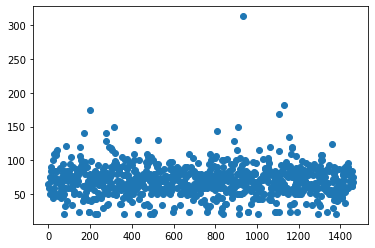

In [15]:
plt.scatter(X_train.index, X_train["LotFrontage"])

Impute `LotFrontage` with forward filling

In [16]:
X_train["LotFrontage"].fillna(method="ffill", inplace=True)

In [17]:
X_train["LotFrontage"].to_frame().transpose()

,618,870,92,817,302,1454,40,959,75,1389,1254,689,648,247,1308,1164,708,186,914,8,390,1333,1441,619,771,465,1248,1288,1120,1031,703,641,1331,540,1161,863,1101,506,546,1051,997,1357,867,1116,425,905,481,483,1382,1128,672,1269,1385,494,569,501,1313,773,1264,759,799,251,249,583,1245,1390,1375,1292,1018,1213,1430,810,477,874,505,1418,634,752,1405,194,240,1276,729,1397,1255,49,998,411,1246,776,581,693,77,1381,44,1195,980,993,300,1401,1058,276,467,489,269,408,1448,875,1374,283,839,399,883,406,512,338,363,692,1334,983,320,427,195,1231,900,70,1125,794,10,1026,686,1247,271,445,654,1280,898,64,682,1384,1100,416,1034,853,472,328,608,452,1227,530,1399,922,912,418,906,751,828,1296,901,716,1069,1226,500,471,1447,487,1336,1177,131,15,1086,911,435,1369,476,1150,466,1127,1424,587,1157,938,1224,721,402,1457,187,191,103,789,60,1064,536,1110,887,1268,1378,934,758,473,82,1148,657,349,1291,1270,117,831,252,1426,311,1133,395,358,263,359,985,1140,726,1393,16,995,1139,761,351,539,1330,969,996,97,1072,1271,196,183,1281,1417,1196,1406,674,81,1220,397,267,1266,132,265,943,1203,565,1130,294,261,1263,629,1431,1414,405,356,239,884,1428,895,988,1442,1001,453,110,1189,1240,1169,1146,503,1063,711,801,864,367,1444,384,200,65,957,783,272,1267,757,1087,744,541,478,808,1126,1310,1180,188,1259,981,904,316,214,878,1398,1400,531,255,30,1115,230,844,893,913,793,1377,264,101,13,1135,790,944,841,566,935,1372,523,1352,1158,670,933,1202,1093,366,1041,228,417,206,79,190,492,725,145,1015,318,820,1186,457,144,1210,992,824,760,1459,592,1154,918,83,154,999,1395,748,1309,880,403,150,1061,413,955,1324,987,717,840,805,847,352,95,625,571,37,485,143,762,158,552,818,792,982,1046,746,236,920,222,1279,1170,940,661,588,881,1258,62,1277,193,235,181,1174,892,923,521,669,829,924,1027,733,382,1354,331,798,262,6,266,38,1416,545,118,652,785,1023,105,1091,484,1408,842,683,20,242,50,162,731,764,877,1178,301,1052,172,707,658,1095,284,1036,1262,1445,1456,1191,1197,668,1346,344,306,217,1432,289,378,167,421,225,616,12,522,1092,68,1188,380,950,372,258,1236,1239,304,1305,410,1411,42,208,974,490,596,74,515,285,1187,71,561,179,915,1368,493,116,293,76,861,775,772,1205,1005,576,622,564,1012,1423,409,1451,1437,1229,288,994,630,524,157,337,1380,496,46,747,135,753,462,953,862,439,177,570,424,325,643,664,350,447,916,1332,1099,1433,1032,946,1360,345,475,313,754,451,170,699,1458,133,813,1165,830,1287,346,396,1193,389,385,1347,119,1103,1113,229,1235,21,766,243,1079,35,593,671,507,1440,1089,961,1181,109,937,379,869,604,1311,627,796,902,660,723,171,677,238,700,1062,1222,856,709,1434,321,120,1295,1238,624,138,456,66,848,745,1056,780,1286,626,605,1443,1209,178,1376,415,100,1230,219,741,334,1190,114,834,681,833,220,391,1344,939,309,1306,1366,527,1010,245,685,518,1050,1044,1370,971,394,640,104,815,1059,1149,720,814,51,602,354,1371,460,22,374,538,1160,218,585,1024,1365,1054,414,205,1183,497,516,702,676,975,185,1132,404,706,419,1185,173,690,827,428,1076,1256,718,282,1088,499,691,0,926,1147,1151,327,213,852,246,1439,1175,1315,1098,1364,365,248,26,836,1319,680,1121,3,134,837,355,292,698,1242,369,1199,226,339,1302,603,454,63,990,237,112,1436,1212,577,126,1008,1156,851,694,137,7,502,854,947,631,929,407,1422,357,153,343,305,1303,612,1145,280,1249,1413,1080,400,468,504,534,1016,903,1253,550,1297,1184,945,336,59,1118,1361,449,855,1142,1136,1299,437,786,873,1343,819,1006,586,941,348,1194,1028,463,1363,653,573,647,595,890,470,800,281,932,732,715,832,951,1144,1037,1168,455,584,147,160,1111,1117,859,952,628,606,164,106,1040,617,1215,329,480,498,1356,93,809,433,1107,43,860,1275,967,1425,1391,765,885,556,1388,69,514,509,340,221,146,1053,1138,803,508,1362,176,804,168,1261,1341,129,189,136,1327,197,290,36,767,232,645,33,1112,1410,1068,865,341,1085,199,429,1438,876,730,919,297,73,807,547,949,1342,1328,821,663,1241,1314,623,1162,212,1353,727,701,1022,1396,1007,978,67,24,216,812,735,1153,111,166,1394,207,274,41,591,1294,525,469,121,1455,1252,928,673,1141,886,956,25,1134,149,925,1176,696,889,598,1020,139,1284,1004,323,180,1272,450,607,10

In [18]:
X_train["FireplaceQu"].unique()

array(['Gd', nan, 'TA', 'Ex', 'Po', 'Fa'], dtype=object)

`nan` in `FireplaceQu` means that this house doesn't have a fireplace. It doesn't indicate a missing value

In [19]:
X_train["FireplaceQu"].fillna("NA", inplace=True)

In [20]:
X_train.isna().sum().sum()

0

# EDA

In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 618 to 684
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1079 non-null   int64  
 1   MSZoning       1079 non-null   object 
 2   LotFrontage    1079 non-null   float64
 3   LotArea        1079 non-null   int64  
 4   Street         1079 non-null   object 
 5   LotShape       1079 non-null   object 
 6   LandContour    1079 non-null   object 
 7   Utilities      1079 non-null   object 
 8   LotConfig      1079 non-null   object 
 9   LandSlope      1079 non-null   object 
 10  Neighborhood   1079 non-null   object 
 11  Condition1     1079 non-null   object 
 12  Condition2     1079 non-null   object 
 13  BldgType       1079 non-null   object 
 14  HouseStyle     1079 non-null   object 
 15  OverallQual    1079 non-null   int64  
 16  OverallCond    1079 non-null   int64  
 17  YearBuilt      1079 non-null   int64  
 18  YearRem

In [22]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,56.079703,70.095459,10770.495829,6.195551,5.602410,1972.466172,1985.532901,110.003707,460.242817,48.274328,581.201112,1089.718258,1172.656163,363.386469,5.090825,1541.133457,0.435589,0.056534,1.578313,0.404078,2.880445,1.030584,6.579240,0.645968,1978.219648,1.863763,498.801668,99.233550,48.871177,22.943466,3.483781,15.726599,2.292864,49.531047,6.319741,2007.808156,186282.242817
std,41.445553,23.249178,11075.699922,1.307797,1.086446,29.932430,20.339844,187.087872,435.772898,160.883723,433.822612,374.503191,372.394515,443.026892,45.048758,509.858486,0.510805,0.231057,0.545799,0.500299,0.764214,0.177571,1.596313,0.642323,24.965931,0.626393,184.723440,129.150123,67.358063,63.550978,29.030204,56.026832,37.953143,561.262722,2.726339,1.334322,77547.272032
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,59.000000,7750.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,252.000000,826.000000,894.000000,0.000000,0.000000,1164.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,6.000000,0.000000,1961.000000,1.000000,376.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,70.000000,9600.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,408.000000,0.000000,490.000000,1024.000000,1104.000000,0.000000,0.000000,1489.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167900.000000
75%,70.000000,80.000000,11734.000000,7.000000,6.000000,2001.000000,2004.000000,176.000000,736.000000,0.000000,817.000000,1307.500000,1406.000000,742.500000,0.000000,1800.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,583.000000,171.500000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,221250.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1120.000000,2153.000000,3200.000000,3228.000000,1872.000000,572.000000,4676.000000,2.000000,1.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
X_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.342336,-0.120321,0.055745,-0.109121,0.052760,0.048593,0.019712,-0.099124,-0.076511,-0.119688,-0.286855,-0.271013,0.324351,0.023707,0.085985,-0.046774,-0.022848,0.151987,0.196812,-0.048346,0.248233,0.021105,-0.040162,0.089229,0.008351,-0.067871,0.001104,-0.004265,-0.011467,-0.036671,-0.038438,0.010461,-0.022661,-0.004905,-0.010257,-0.083450
LotFrontage,-0.342336,1.000000,0.254414,0.161421,-0.045835,0.086932,0.070618,0.113756,0.137282,0.029414,0.073703,0.257755,0.309332,0.033128,0.012739,0.255843,0.089605,-0.003941,0.163565,-0.007706,0.224156,0.011426,0.269956,0.177874,0.062349,0.260273,0.280315,0.072279,0.095634,0.002367,0.050395,0.014275,0.053177,0.011993,0.030705,-0.023959,0.287120
LotArea,-0.120321,0.254414,1.000000,0.064588,0.013253,-0.019650,-0.004947,0.078007,0.173143,0.121046,-0.018183,0.232407,0.262474,0.026331,0.009988,0.215470,0.157978,0.058646,0.107605,-0.018314,0.118886,-0.014265,0.160092,0.258781,-0.040180,0.128873,0.140763,0.142463,0.061073,-0.022069,0.016825,0.027029,0.029044,0.040462,0.001604,-0.020750,0.245739
OverallQual,0.055745,0.161421,0.064588,1.000000,-0.161985,0.570646,0.548577,0.402951,0.165870,-0.098767,0.294251,0.491436,0.461912,0.289814,-0.013874,0.587975,0.064003,-0.064249,0.591285,0.256251,0.097667,-0.133631,0.440695,0.359672,0.557934,0.606671,0.533906,0.188057,0.295679,-0.109684,0.042611,0.048561,0.010096,-0.031513,0.051393,-0.031109,0.783733
OverallCond,-0.109121,-0.045835,0.013253,-0.161985,1.000000,-0.393422,0.052751,-0.126146,-0.052256,0.058234,-0.157490,-0.218223,-0.121012,0.003881,0.044749,-0.081059,-0.040339,0.130272,-0.190703,-0.064256,0.018671,-0.066739,-0.062317,-0.030414,-0.306013,-0.221429,-0.169211,-0.007516,-0.035636,0.101756,0.048046,0.053106,0.015695,0.087298,-0.010908,0.077235,-0.090317
YearBuilt,0.052760,0.086932,-0.019650,0.570646,-0.393422,1.000000,0.618329,0.303007,0.224380,-0.067083,0.131100,0.384137,0.242369,0.007307,-0.170707,0.168290,0.172543,-0.074500,0.480661,0.231103,-0.082682,-0.202172,0.082271,0.118358,0.822642,0.514227,0.431450,0.209585,0.202988,-0.407147,0.025828,-0.069476,-0.023724,-0.035024,0.002332,-0.019266,0.501224
YearRemodAdd,0.048593,0.070618,-0.004947,0.548577,0.052751,0.618329,1.000000,0.178748,0.103646,-0.083566,0.155156,0.264435,0.236603,0.132429,-0.067215,0.281944,0.115047,-0.035432,0.471070,0.177731,-0.062737,-0.156823,0.176306,0.101504,0.645890,0.470664,0.394955,0.191979,0.232360,-0.226757,0.051025,-0.039829,-0.009994,0.002245,0.011060,0.040787,0.511196
MasVnrArea,0.019712,0.113756,0.078007,0.402951,-0.126146,0.303007,0.178748,1.000000,0.253702,-0.094878,0.091340,0.360257,0.329947,0.159942,-0.066507,0.374090,0.066699,0.015832,0.270480,0.187386,0.108212,-0.012373,0.261674,0.226189,0.250733,0.374123,0.349026,0.152759,0.123959,-0.136352,0.004639,0.044808,-0.027173,-0.034083,-0.004796,-0.027429,0.482103
BsmtFinSF1,-0.099124,0.137282,0.173143,0.165870,-0.052256,0.224380,0.103646,0.253702,1.000000,-0.054651,-0.585292,0.462125,0.418173,-0.189980,-0.056799,0.135333,0.647131,0.075023,0.041153,-0.051007,-0.112810,-0.051957,0.008863,0.236249,0.140255,0.209446,0.262007,0.184447,0.090020,-0.114315,0.032898,0.040267,0.006848,0.007750,-0.008402,0.004694,0.370647
BsmtFinSF2,-0.076511,0.029414,0.121046,-0.098767,0.058234,-0.067083,-0.083566,-0.094878,-0.054651,1.000000,-0.249094,0.077451,0.080152,-0.137147,0.009835,-0.059759,0.166080,0.092688,-0.125388,-0.044989,-0.037593,-0.032018,-0.070324,0.018373,-0.093349,-0.093842,-0.071749,0.064357,-0.006385,0.033711,-0.031124,0.091434,0.033282,0.000148,-0.029322,0.020685,-0.042342


* `YearBuilt` and `GarageYrBlt` are highly correlated: 0.82
* `YearBuilt` and `YearRemodAdd` are somewhat highly correlated, and have almost the same effect on the target variable: 0.61
* `TotalBsmtSF` and `1stFlrSF` are highly correlated: 0.88
* `2ndFlrSF` is highly correlated with `GrLivArea`: 0.70
* `GrLivArea` is highly correlated with `TotRmsAbvGrd`: 0.83
* `GarageArea` is highly correlated with `GarageCars`: 0.84

In [24]:
redundant_cols = ["GarageYrBlt", "YearRemodAdd", "TotalBsmtSF", "2ndFlrSF", "TotRmsAbvGrd", "GarageArea"]
X_train.drop(redundant_cols, axis="columns", inplace=True)

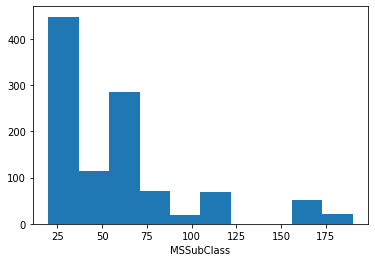

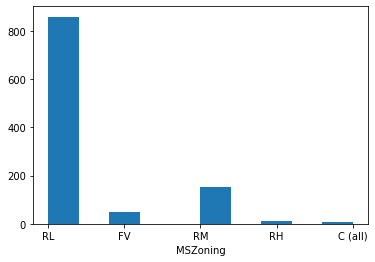

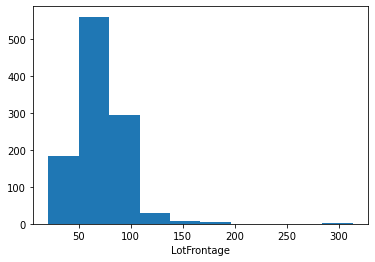

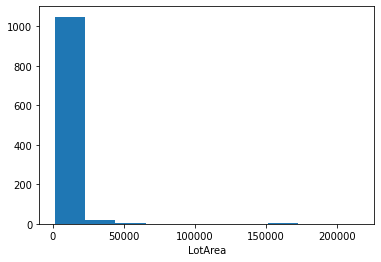

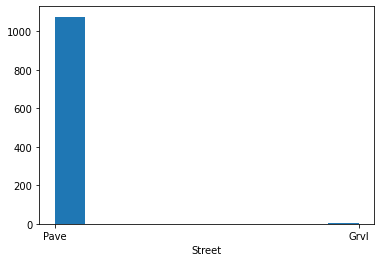

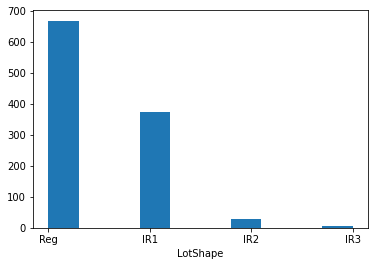

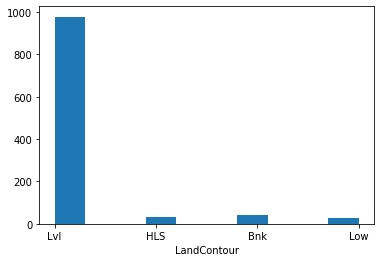

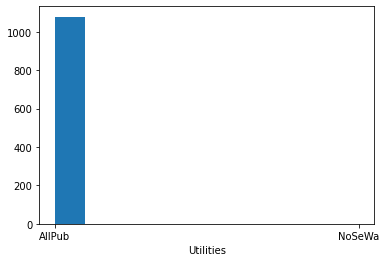

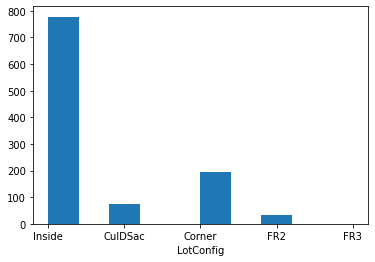

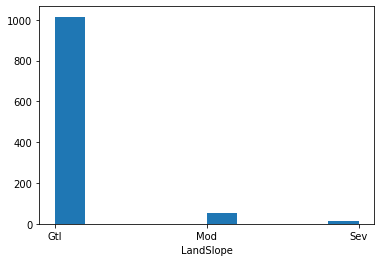

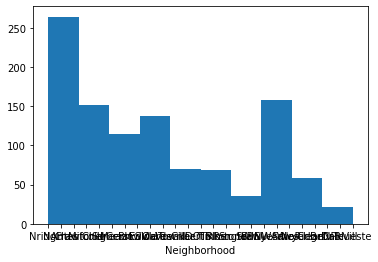

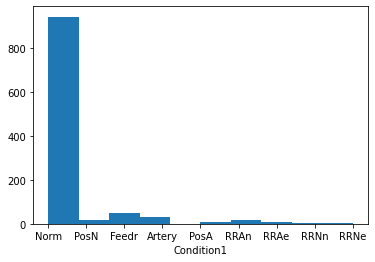

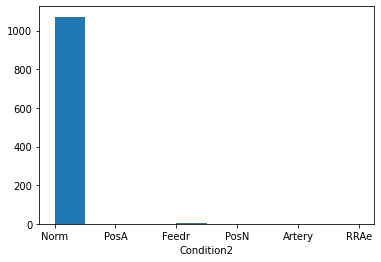

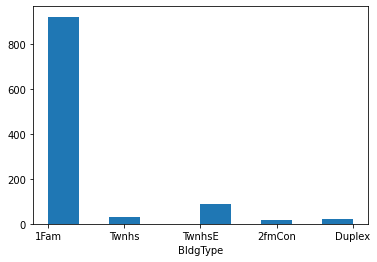

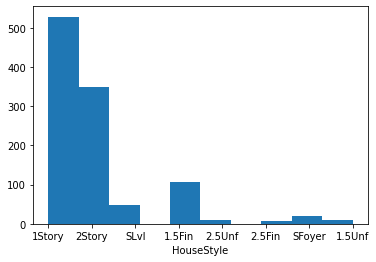

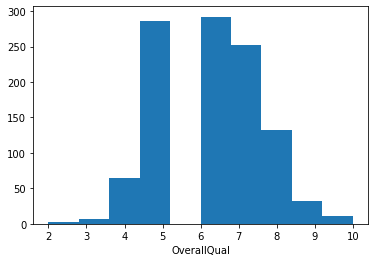

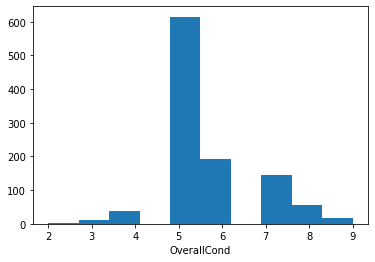

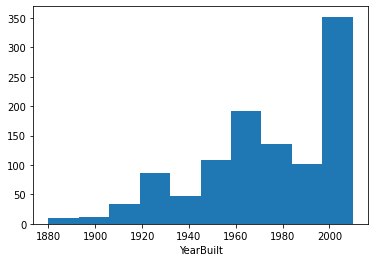

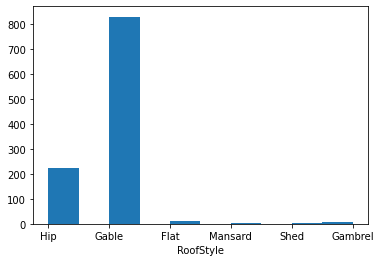

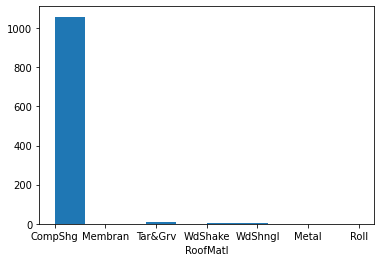

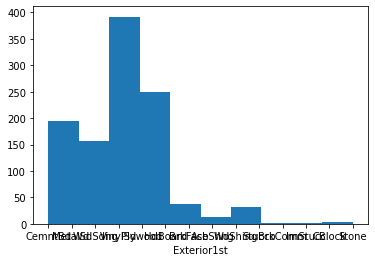

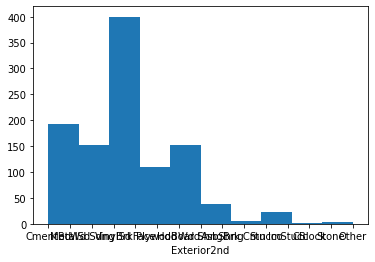

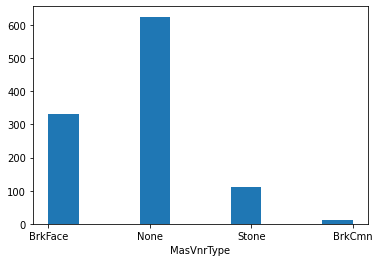

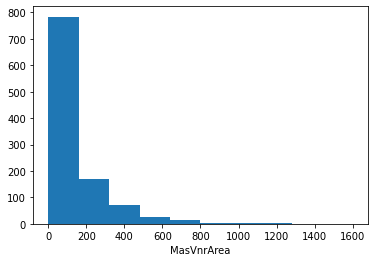

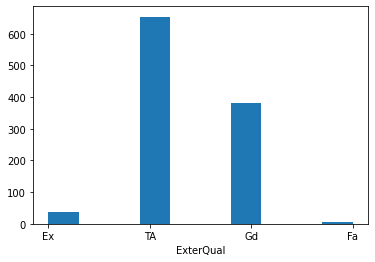

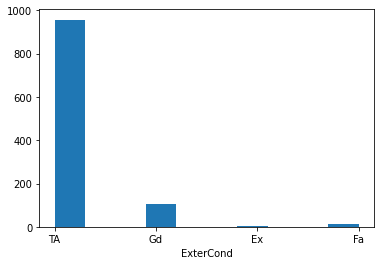

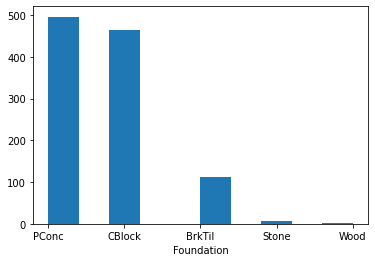

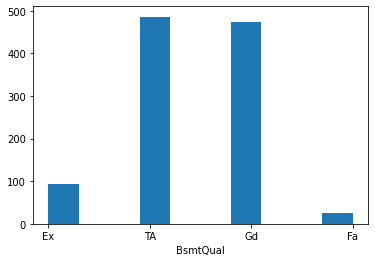

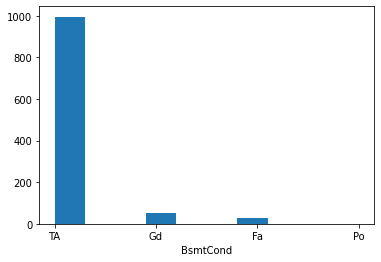

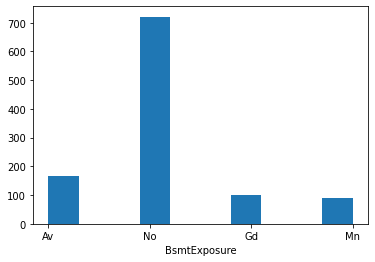

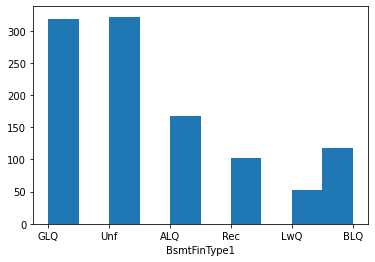

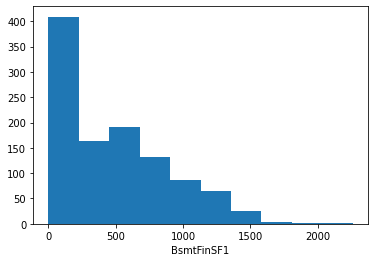

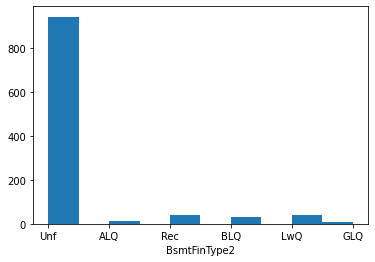

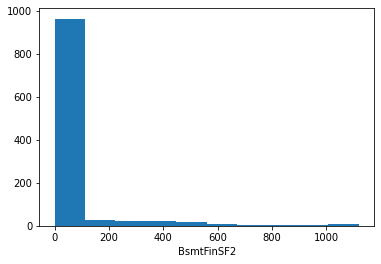

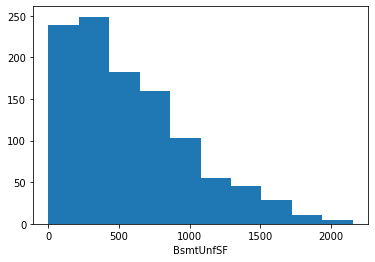

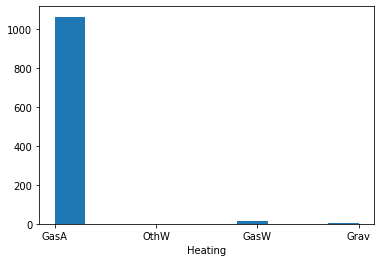

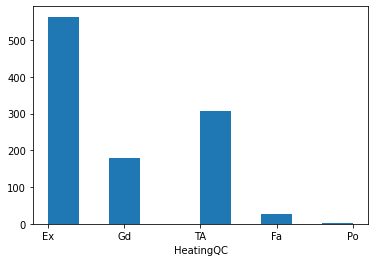

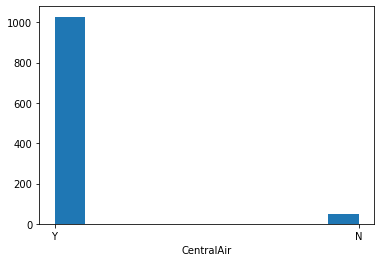

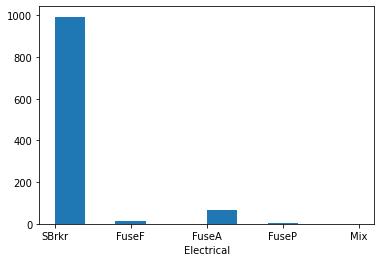

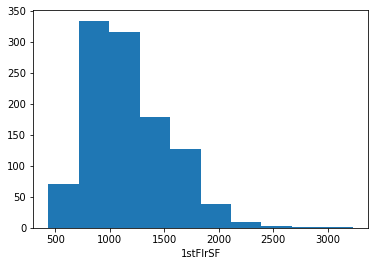

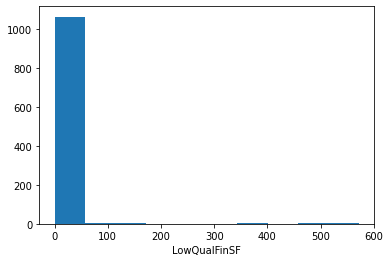

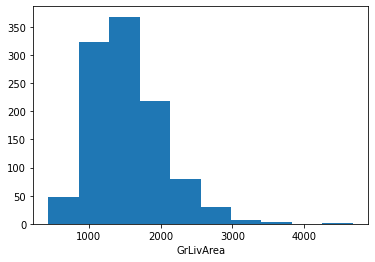

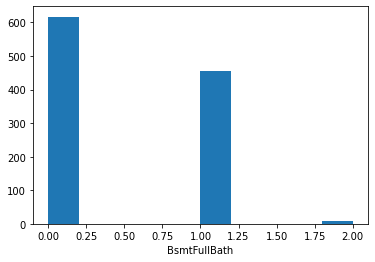

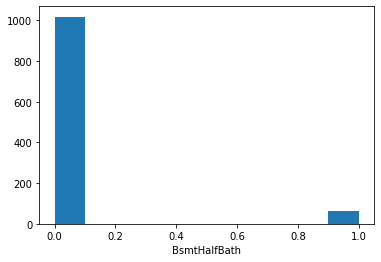

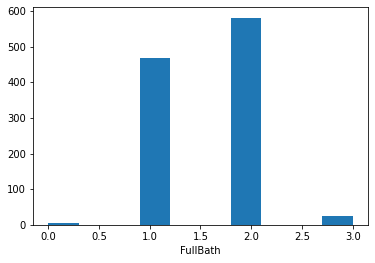

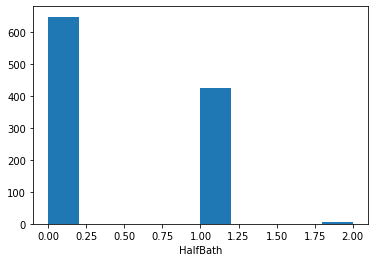

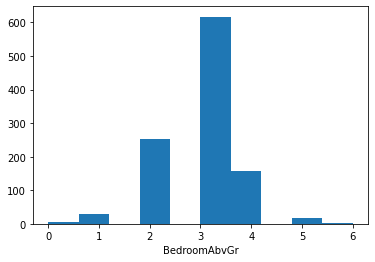

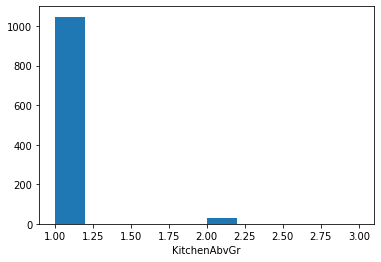

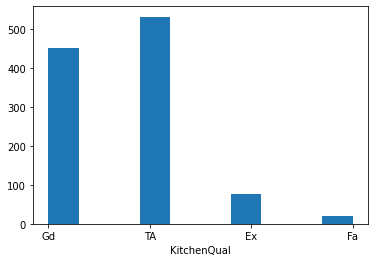

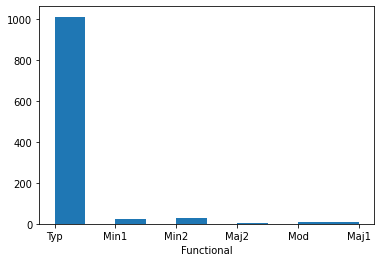

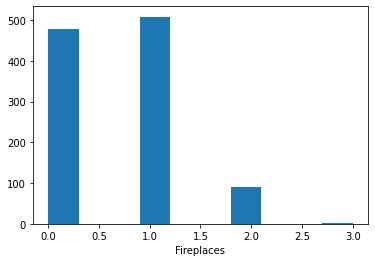

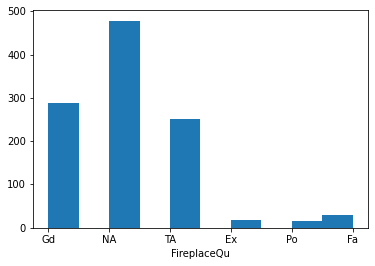

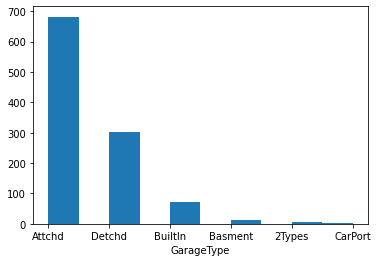

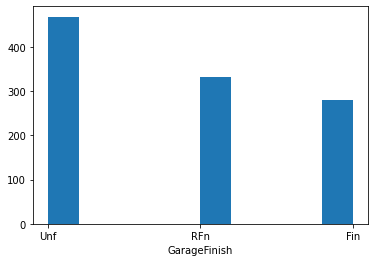

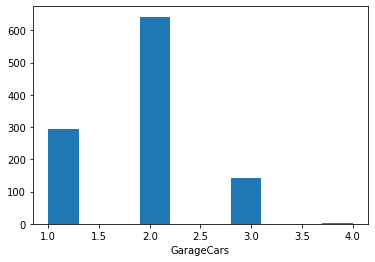

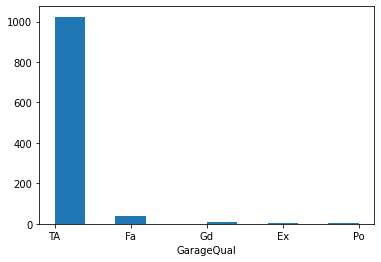

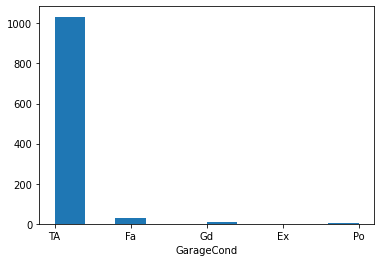

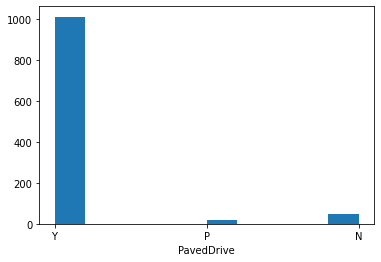

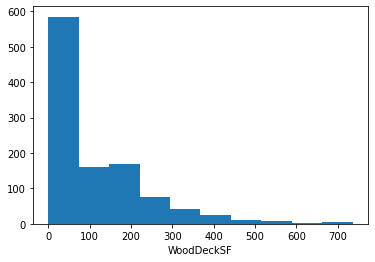

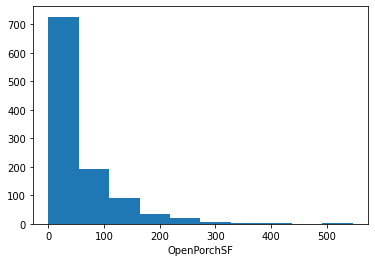

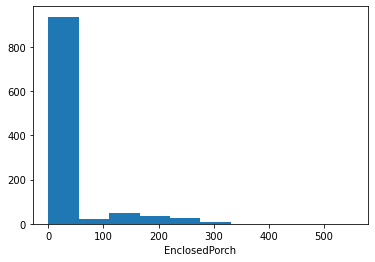

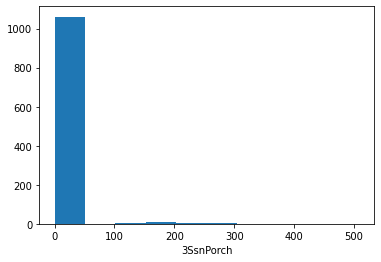

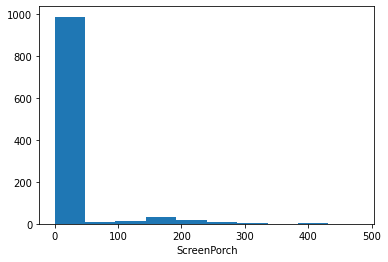

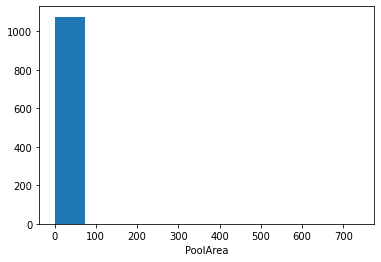

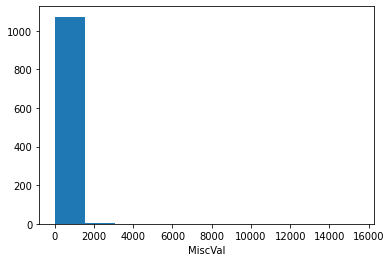

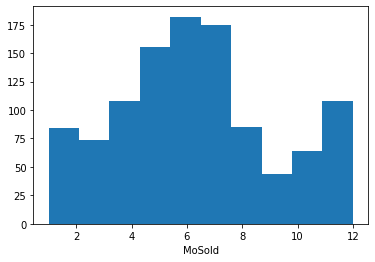

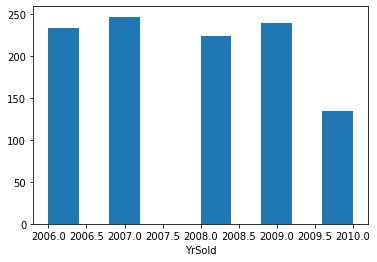

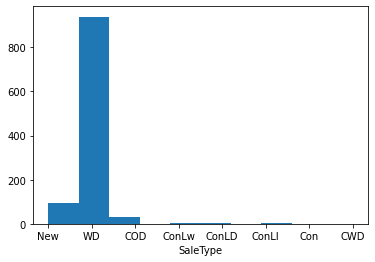

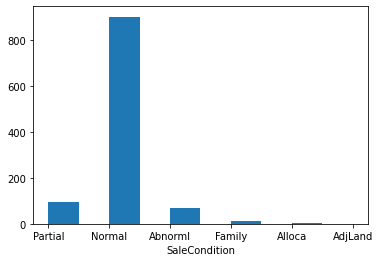

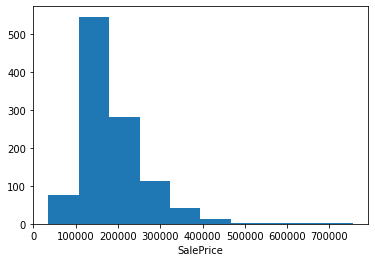

In [25]:
for feature in X_train:
  plt.hist(X_train[feature])
  plt.xlabel(feature)
  plt.show()

In [26]:
X_train.shape

(1079, 70)

# No Noise
Only outliers, which will be used to optimize our model's generalization power 

# Feature Engineering

* Ordinal:
  - `MSSubClass`: Left as is
  - `Utilities`: Only has one occurrence of `NoSeWa`, the rest `AllPub`. Removed
  - `HouseStyle`: Mapped
  - `OverallQual`: Already mapped
  - `OverallCond`: Alreay mapped
  - `ExterQual`: Mapped
  - `ExterCond`: Mapped
  - `BsmtQual`: Mapped
  - `BsmtCond`: Mapped
  - `BsmtExposure`: Mapped
  - `BsmtFinType1`: Mapped
  - `BsmtFinType2`: Mapped
  - `HeatingQC`: Mapped
  - `KitchenQual`: Mapped
  - `Functional`: Mapped
  - `FireplaceQu`: Mapped
  - `GarageFinish`: Mapped
  - `GarageQual`: Mapped
  - `GarageCond`: Mapped
  - `PoolQC`: Already removed
  - `Fence`: Already removed
  - `Street`: Badly distributed (1333:5). Removed
  - `LotShape`: Mapped
  - `Alley`: Already removed
  - `LotConfig`: Mapped
  - `LandSlope`: Mapped
  - `BldgType`: Mapped
  - `RoofStyle`: Mapped
  - `Exterior1st`: Mapped
  - `CentralAir`: Mapped
  - `Electrical`: Mapped
  - `GarageType`: Mapped
  - `PavedDrive`: Mapped
  - `SaleCondition`: Merged
* Nominal:
  - `LandContour`: Mapped
  - `MSZoning`: Mapped
  - `Neighborhood`: Mapped
  - `Condition1`: Mapped
  - `Condition2`: Mapped
  - `RoofMatl`: Mapped
  - `Exterior2nd`: Mapped
  - `MasVnrType`: Mapped
  - `Foundation`: Mapped
  - `Heating`: Mapped
  - `MiscFeature`: Already removed
  - `SaleType`: Merged

In [27]:
badly_distributed_cols = ["Utilities", "Street"]
X_train.drop(badly_distributed_cols, axis="columns", inplace=True)
X_train.shape

(1079, 68)

# Model Induction

## Preparing Train and Test Sets

In [28]:
X_test.shape

(292, 81)

In [29]:
describe_missing(X_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
NaN Count,0.0,0.0,0.0,47.000000,0.0,0.0,272.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,2.000000,0.0,0.0,0.0,9.000000,9.000000,10.000000,9.000000,0.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.000000,23.000000,23.000000,23.000000,0.0,0.0,23.000000,23.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.000000,225.000000,287.000000,0.0,0.0,0.0,0.0,0.0,0.0
NaN Ratio,0.0,0.0,0.0,0.160959,0.0,0.0,0.931507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006849,0.006849,0.0,0.0,0.0,0.030822,0.030822,0.034247,0.030822,0.0,0.030822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.476027,0.078767,0.078767,0.078767,0.0,0.0,0.078767,0.078767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.989726,0.770548,0.982877,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X_test.isna().sum().sum()

1424

* First, remove all the columns that was removed in the training phase

In [31]:
removed_cols = X_test.columns.difference(X_train.columns)
X_test.drop(removed_cols, axis="columns", inplace=True)
X_test.shape

(292, 68)

In [32]:
X_test.isna().sum().sum()

328

* Then remove the rows that have `nan` values

In [33]:
new_X_test = X_test.dropna(axis="rows")
y_test = y_test[new_X_test.index]
X_test = new_X_test
X_test.isna().sum().sum()

0

In [34]:
X_test.shape

(115, 68)

In [35]:
X_train.drop(["SalePrice"], axis="columns", inplace=True)
X_test.drop(["SalePrice"], axis="columns", inplace=True)

## Features Encoding

In [36]:
encoders = [
  OrdinalEncoder(mapping=[
    {
      "col":"HouseStyle",
      "mapping": {
        "1Story":0,
        "1.5Fin":1,
        "1.5Unf":2,
        "2Story":3,
        "2.5Fin":4,
        "2.5Un":5,
        "SFoyer":6,
        "SLvl":7
      }
    },
    {
      "col":"ExterQual",
      "mapping": {
        "Po":0,
        "Fa":1,
        "TA":2,
        "Gd":3,
        "Ex":4
      }
    },
    {
      "col":"ExterCond",
      "mapping": {
        "Po":0,
        "Fa":1,
        "TA":2,
        "Gd":3,
        "Ex":4
      }
    },
    {
      "col":"BsmtQual",
      "mapping": {
        "Po":0,
        "Fa":1,
        "TA":2,
        "Gd":3,
        "Ex":4
      }
    },
    {
      "col":"BsmtCond",
      "mapping": {
        "Po":0,
        "Fa":1,
        "TA":2,
        "Gd":3,
        "Ex":4
      }
    },
    {
      "col":"BsmtExposure",
      "mapping": {
        "No":0,
        "Mn":1,
        "Av":2,
        "Gd":3
      }
    },
    {
      "col":"BsmtFinType1",
      "mapping": {
        "Unf":0,
        "LwQ":1,
        "Rec":2,
        "BLQ":3,
        "ALQ":4,
        "GLQ":5
      }
    },
    {
      "col":"BsmtFinType2",
      "mapping": {
        "Unf":0,
        "LwQ":1,
        "Rec":2,
        "BLQ":3,
        "ALQ":4,
        "GLQ":5
      }
    },
    {
      "col":"HeatingQC",
      "mapping": {
        "Po":0,
        "Fa":1,
        "TA":2,
        "Gd":3,
        "Ex":4
      }
    },
    {
      "col":"KitchenQual",
      "mapping": {
        "Po":0,
        "Fa":1,
        "TA":2,
        "Gd":3,
        "Ex":4
      }
    },
    {
      "col":"Functional",
      "mapping": {
        "Sal":0,
        "Sev":1,
        "Maj2":2,
        "Maj1":3,
        "Mod":4,
        "Min2":5,
        "Min1":6,
        "Typ":7
      }
    },
    {
      "col":"GarageFinish",
      "mapping": {
        "Unf":0,
        "RFn":1,
        "Fin":2
      }
    },
    {
      "col":"GarageQual",
      "mapping": {
        "Po":0,
        "Fa":1,
        "TA":2,
        "Gd":3,
        "Ex":4
      }
    },
    {
      "col":"GarageCond",
      "mapping": {
        "Po":0,
        "Fa":1,
        "TA":2,
        "Gd":3,
        "Ex":4
      }
    },
    {
      "col":"LotShape",
      "mapping": {
        "Reg":0,
        "IR1":1,
        "IR2":2,
        "IR3":3
      }
    },
    {
      "col":"LotConfig",
      "mapping": {
        "Inside":0,
        "Corner":1,
        "CulDSac":2,
        "FR2":3,
        "FR3":4
      }
    },
    {
      "col":"LandSlope",
      "mapping": {
        "Sev":0,
        "Mod":1,
        "Gtl":2
      }
    },
    {
      "col":"BldgType",
      "mapping": {
        "1Fam":0,
        "2fmCon":1,
        "Duplex":2,
        "TwnhsE":3,
        "Twnhs":4
      }
    },
    {
      "col": "RoofStyle",
      "mapping": {
        "Flat":0,
        "Gable":1,
        "Hip":2,
        "Mansard":3,
        "Shed":4
      }
    },
    {
      "col": "CentralAir",
      "mapping": {
        "N":0,
        "Y":1
      }
    },
    {
      "col": "Electrical",
      "mapping": {
        "SBrkr":0,
        "FuseA":1,
        "FuseF":2,
        "FuseP":3,
        "Mix":4,
      }
    },
    {
      "col": "GarageType",
      "mapping": {
        "Detchd":0,
        "CarPort":1,
        "Basment":2,
        "BuiltIn":3,
        "Attchd":4,
        "2Types":5
      }
    },
    {
      "col": "PavedDrive",
      "mapping": {
        "N":0,
        "P":1,
        "Y":2
      }
    },
    {
      "col": "SaleCondition",
      "mapping": {
        "Normal":0,
        "Abnorml":1,
        "AdjLand":2,
        "Alloca":3,
        "Family":4,
        "Partial":5
      }
    }
  ]),
  OneHotEncoder()
]

## K-NN

In [37]:
conventional_k = 5
optimal_k = floor(sqrt(X_train.shape[0]))
knn_grid_params = { "kneighborsregressor__n_neighbors": [1, conventional_k, floor((optimal_k + conventional_k) / 2), optimal_k] }

knn_gs_cv = GridSearchCV(
  make_pipeline(*encoders, StandardScaler(), KNeighborsRegressor()),
  knn_grid_params,
  verbose=1,
  cv=5,
  n_jobs=-1
)
knn_reg = knn_gs_cv.fit(X_train, y_train)

print(f"Best parameter(s): {knn_reg.best_params_}, with score {knn_reg.best_score_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter(s): {'kneighborsregressor__n_neighbors': 18}, with score 0.6946920364043662


## Polynomial Regression

In [38]:
pol_grid_params = {
  "polynomialfeatures__degree": [2],
  "ridge__alpha": [.0001, .001, .01, .1],
}

pol_gs_cv = GridSearchCV(
  make_pipeline(*encoders, StandardScaler(), PolynomialFeatures(), Ridge()),
  pol_grid_params,
  verbose=1,
  cv=5,
  n_jobs=-1
)
pol_reg = pol_gs_cv.fit(X_train, y_train)

print(f"Best parameter(s): {pol_reg.best_params_}, with score {pol_reg.best_score_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameter(s): {'polynomialfeatures__degree': 2, 'ridge__alpha': 0.1}, with score 0.27899571968466874


## Random Forest

In [39]:
random_forest_params = {
  "randomforestregressor__max_depth": [None, 100],
  "randomforestregressor__min_samples_split": [10, 50],
  "randomforestregressor__max_features": ["sqrt", "log2"],
  "randomforestregressor__n_estimators": [100, 200]
}

random_forest_gs_cv = GridSearchCV(
  make_pipeline(*encoders, RandomForestRegressor(random_state=0)),
  random_forest_params,
  verbose=1,
  cv=5,
  n_jobs=-1
)
random_forest_reg = random_forest_gs_cv.fit(X_train, y_train)

print(f"Best parameter(s): {random_forest_gs_cv.best_params_}, with score {random_forest_reg.best_score_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameter(s): {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__n_estimators': 100}, with score 0.8394557404793103


## AdaBoost

In [40]:
ada_boost_params = {
  "adaboostregressor__n_estimators": [100, 200],
  "adaboostregressor__learning_rate": [.1, .5, 1],
  "adaboostregressor__loss": ["linear", "square", "exponential"]
}

ada_boost_gs_cv = GridSearchCV(
  make_pipeline(*encoders, AdaBoostRegressor(random_state=0)),
  ada_boost_params,
  verbose=1,
  cv=5,
  n_jobs=-1
)
ada_boost_reg = ada_boost_gs_cv.fit(X_train, y_train)

print(f"Best parameter(s): {ada_boost_reg.best_params_}, with score {ada_boost_reg.best_score_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameter(s): {'adaboostregressor__learning_rate': 1, 'adaboostregressor__loss': 'exponential', 'adaboostregressor__n_estimators': 100}, with score 0.7935427283576829


## Gradient Boosting Tree

In [41]:
gbt_params = {
  "gradientboostingregressor__learning_rate": [0.01, 0.05, 0.1, 0.2],
  "gradientboostingregressor__max_depth": [3, 5, 10, 20],
  "gradientboostingregressor__min_samples_split": [2, 5, 10],
  "gradientboostingregressor__max_features": ["sqrt", "log2"],
  "gradientboostingregressor__n_estimators": [100, 200],
}

gbt_gs_cv = GridSearchCV(
  make_pipeline(*encoders, GradientBoostingRegressor(random_state=0)),
  gbt_params,
  verbose=1,
  cv=5,
  n_jobs=-1
)
gbt_reg = gbt_gs_cv.fit(X_train, y_train)

print(f"Best parameter(s): {gbt_reg.best_params_}, with score {gbt_reg.best_score_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameter(s): {'gradientboostingregressor__learning_rate': 0.05, 'gradientboostingregressor__max_depth': 5, 'gradientboostingregressor__max_features': 'log2', 'gradientboostingregressor__min_samples_split': 10, 'gradientboostingregressor__n_estimators': 200}, with score 0.8790789218644873


In [42]:
gbt_reg.score(X_test, y_test)

0.7958089723987878

In [43]:
ada_boost_reg.score(X_test, y_test)

0.6670379223963208

In [44]:
random_forest_reg.score(X_test, y_test)

0.7208297148075584

In [45]:
pol_reg.score(X_test, y_test)

-1.1893119511520478

In [46]:
knn_reg.score(X_test, y_test)

0.5031048950286494

### The winner algorithm is Gradient Boosting Tree 🎉🏆

In [47]:
final_model = gbt_reg.best_estimator_.fit(
  X_train.append(X_test),
  y_train.append(y_test)
)

# Pickling

In [48]:
model_file = open('./pickles/model.pickle', 'wb')
pickle.dump(final_model, model_file)
model_file.close()

considered_cols_order_file = open("./pickles/considered_features_order.pickle", "wb")
pickle.dump(X_train.columns.values, considered_cols_order_file)
considered_cols_order_file.close()